# **Project 1: Data Analysis Project**

**By Christian Hjorth Hansen and Jacob Mai Kaaber**

## **Introduction**

This project focuses on analyzing the stock market prices of the three biggest energy firms world wide, based on turnover. The considered firms are *Exxon Mobile Corparation*, *Chevron Corporation* and *Royal Dutch Shell* (it should be mentioned that we consider the B share of Royal Dutch Shell as these are traded more frequently).
For further analyzis we include a weighted averge of the three firms and oil prices later on.

Our analyzis is primarily carried out by presenting data visually and using methods from descreptive economics.

## **Importing packages**

We start by importing all the necessary packages for our analyzis. 

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import datetime as datetime
import pandas_datareader
import numpy as np
import ipywidgets as widgets
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

## **Pick start and end date**

Here we have chosen the 1st of January 2016 as the start date and the 20th of March as the end date of our sample. 

In [93]:
start = datetime.datetime(2016,1,1)
end   = datetime.datetime(2019,3,20)

## **Importing stock prices**

We are going to import the data in three section, one for each firm. The data is being imported as daily data from IEX.

### Exxon Mobile Corporation

**First** we import the data.

In [94]:
XOM = pandas_datareader.iex.daily.IEXDailyReader('XOM', start, end).read()

**Next** we drop the variables, which we aren't going to use (the opening, highest and lowest price during a trading day).

In [95]:
del XOM['open']
del XOM['high']
del XOM['low']

**Next** we add three new variable: The company name, the closing prices demeaned and the percentage change in the closing price.

In [96]:
XOM['firm'] = 'Exxon Mobile'
XOM['close_demeaned'] = XOM.groupby('firm')['close'].transform(lambda x: x - x.mean())
XOM['percentage_change, %'] = ((XOM.close - XOM.close.shift(1)) / XOM.close.shift(1))*100

**Lastly** we convert the date from index to dates using datetime

In [97]:
XOM.index = pd.to_datetime(XOM.index)

To test that the code works as intended, we print the first five observations.

In [98]:
XOM.head()

,close,volume,firm,close_demeaned,"percentage_change, %"
date,,,,,
2016-01-04,67.0563,20400084,Exxon Mobile,-8.873776,NaN
2016-01-05,67.6276,11993500,Exxon Mobile,-8.302476,0.851971
2016-01-06,67.0649,18826900,Exxon Mobile,-8.865176,-0.832057
2016-01-07,65.9915,21263761,Exxon Mobile,-9.938576,-1.600539
2016-01-08,64.6583,19033628,Exxon Mobile,-11.271776,-2.020260


### Chevron Corporation

**First** we import the data.

In [99]:
CVX = pandas_datareader.iex.daily.IEXDailyReader('CVX', start, end).read()

**Next** we drop the variables, we are not going to use.

In [100]:
del CVX['open']
del CVX['high']
del CVX['low']

**Next** we add a new variable with the company name.

In [101]:
CVX['firm'] = 'Chevron'
CVX['close_demeaned'] = CVX.groupby('firm')['close'].transform(lambda x: x - x.mean())
CVX['percentage_change, %'] = ((CVX.close - CVX.close.shift(1)) / CVX.close.shift(1))*100

**Lastly** we convert the date from index to dates using datetime.

In [102]:
CVX.index = pd.to_datetime(CVX.index)

And to test that the code works as intended, we print the first five observations.

In [103]:
CVX.head()

,close,volume,firm,close_demeaned,"percentage_change, %"
date,,,,,
2016-01-04,77.2292,11397278,Chevron,-26.238045,NaN
2016-01-05,77.8898,7883427,Chevron,-25.577445,0.855376
2016-01-06,74.8128,14511395,Chevron,-28.654445,-3.950453
2016-01-07,72.1617,15368822,Chevron,-31.305545,-3.543645
2016-01-08,71.3881,11891638,Chevron,-32.079145,-1.072037


### Royal Dutch Shell (B Shares)

**First** we import the data

In [104]:
RDS = pandas_datareader.iex.daily.IEXDailyReader('RDS.B', start, end).read()

**Next** we drop the variables, we are not going to use.

In [105]:
del RDS['open']
del RDS['high']
del RDS['low']

**Next** we add a new variable with the company name.

In [106]:
RDS['firm'] = 'Shell'
RDS['close_demeaned'] = RDS.groupby('firm')['close'].transform(lambda x: x - x.mean())
RDS['percentage_change, %'] = ((RDS.close - RDS.close.shift(1)) / RDS.close.shift(1))*100

**Lastly** we convert the date from index to dates using datetime

In [107]:
RDS.index = pd.to_datetime(RDS.index)

And to test that the code works as intended, we print the first five observations.

In [108]:
RDS.head()

,close,volume,firm,close_demeaned,"percentage_change, %"
date,,,,,
2016-01-04,38.2145,3602883,Shell,-17.043389,NaN
2016-01-05,37.8684,2445582,Shell,-17.389489,-0.905677
2016-01-06,36.4097,2052720,Shell,-18.848189,-3.852024
2016-01-07,34.6461,5699700,Shell,-20.611789,-4.843764
2016-01-08,32.7011,11210025,Shell,-22.556789,-5.613907


## **Combining the data sets**

Now we combine the three data sets to get a proxy for the market. We will need this to show the average price over time, the overall volume each day and the average volume each day.

In [109]:
Market=pd.merge(pd.merge(XOM,CVX,on='date'),RDS,on='date')
del Market['firm_x']
del Market['firm_y']
del Market['close_demeaned_x']
del Market['close_demeaned_y']
del Market['close_demeaned']
del Market['percentage_change, %_x']
del Market['percentage_change, %_y']
del Market['percentage_change, %']
Market.loc[Market.firm=='Shell', 'firm'] = 'Market'
Market=Market.rename(columns={'close_x': 'close_XOM', 'volume_x': 'volume_XOM', 'close_y': 'close_CVX', 'volume_y': 'volume_CVX', 'close': 'close_RDS', 'volume': 'volume_RDS'})
Market['Average_close'] = Market.apply(lambda row: (row.close_XOM + row.close_CVX + row.close_RDS)/3, axis=1)
Market['Average_volume'] = Market.apply(lambda row: (row.volume_XOM + row.volume_CVX + row.volume_RDS)/3, axis=1)
Market['Total_volume'] = Market.apply(lambda row: row.volume_XOM + row.volume_CVX + row.volume_RDS, axis=1)
del Market['close_XOM']
del Market['close_CVX']
del Market['close_RDS']
del Market['volume_XOM']
del Market['volume_CVX']
del Market['volume_RDS']
Market['close_demeaned'] = Market.groupby('firm')['Average_close'].transform(lambda x: x - x.mean())
Market['percentage_change, %'] = ((Market.Average_close - Market.Average_close.shift(1)) / Market.Average_close.shift(1))*100

To test that the code works as intented we print the first five observations.

In [110]:
Market.head()

,firm,Average_close,Average_volume,Total_volume,close_demeaned,"percentage_change, %"
date,,,,,,
2016-01-04,Market,60.833333,1.180008e+07,35400245,-17.385070,NaN
2016-01-05,Market,61.128600,7.440836e+06,22322509,-17.089803,0.485370
2016-01-06,Market,59.429133,1.179700e+07,35391015,-18.789270,-2.780150
2016-01-07,Market,57.599767,1.411076e+07,42332283,-20.618637,-3.078232
2016-01-08,Market,56.249167,1.404510e+07,42135291,-21.969237,-2.344801


## **Importing the oil prices**

We downloaded the oil prices from the FRED ( https://fred.stlouisfed.org/series/DCOILWTICO?fbclid=IwAR1d3Qi-6_BbMOIFeF6JZbPJpXhSgGYPno7NtQFQSWmaMgqrw7pxTnJmrpU )in the form of a csv-file, which is placed in the same folder as this workbook. We construct the data such that it matches the other datasets. 

In [111]:
Oil=pd.read_csv('.\Oil_prices.csv')
Oil=Oil.rename(columns={'DCOILWTICO': 'price', 'DATE': 'Date'})
Oil.index = Oil['Date']
del Oil['Date']
Oil.price=Oil.convert_objects(convert_numeric=True)
Oil['firm'] = 'Oil'
Oil['price_demeaned'] = Oil.groupby('firm')['price'].transform(lambda x: x - x.mean())
Oil['percentage_change, %'] = ((Oil.price - Oil.price.shift(1)) / Oil.price.shift(1))*100
Oil.index = pd.to_datetime(Oil.index)

To test that the code works as intended we print the first five observations.

In [112]:
Oil.head()

,price,firm,price_demeaned,"percentage_change, %"
Date,,,,
2016-01-04,36.81,Oil,-16.332398,NaN
2016-01-05,35.97,Oil,-17.172398,-2.281989
2016-01-06,33.97,Oil,-19.172398,-5.560189
2016-01-07,33.29,Oil,-19.852398,-2.001766
2016-01-08,33.20,Oil,-19.942398,-0.270351


## **Visualizations**

In this section we create four figures. One for the closing price, one for the closing price demeaned, one for the percentage growth and one for the volume. The first three figures shows the devolopments for each of the three firms. We added a widget, which allows the reader to choose which firms to consider (The widget is by default set to look at all three firms at once). The last figure shows the volume, which has been divided into the five weekdays. 

### Closing price

In [121]:
def Fig1():
    
    def fig(temp1, temp2, temp3, temp4, temp5):
        if temp1 == True:
            XOM.groupby('firm')['close'].plot(legend=True, color='green')
        if temp2 == True:
            CVX.groupby('firm')['close'].plot(legend=True, color='blue')
        if temp3 == True:
            RDS.groupby('firm')['close'].plot(legend=True, color='orange')
        if temp4 == True:
            Market.groupby('firm')['Average_close'].plot(legend=True, color='red')
        if temp5 == True:
            Oil.groupby('firm')['price'].plot(legend=True, color='black') 
            
        plt.xlabel('Date')
        plt.ylabel('Dollars')
        plt.title('Figure 1: Closing price')
        plt.ylim([20,180])
        plt.legend(loc='upper left') 

    widgets.interact(fig,
           temp1=widgets.Checkbox(description='Exxon', value=True, disabled=False),
           temp2=widgets.Checkbox(description='Chevron', value=True, disabled=False),
           temp3=widgets.Checkbox(description='Royal Dutch Shell', value=True, disabled=False),
           temp4=widgets.Checkbox(description='Average Market', value=True, disabled=False),       
           temp5=widgets.Checkbox(description='Oil Market', value=True, disabled=False),       
        );

Fig1()

interactive(children=(Checkbox(value=True, description='Exxon'), Checkbox(value=True, description='Chevron'), …

We note that Chevron has the highest stockprice in the period. We also see that both Shell's and Chevron's stockprice have increased in the period, while Exxon's stockprice has been rather stable. All firms seems to follow the same trend, which is seen clearly illustrated during the **third** **(du skrev first)** quarter of 2018, where all the stockprices fell simultaneously (likely due to the financial crisis). 
They co-move to some extend, which - among other things - might be due to them operating in the same industri (Energy production). Some market shocks are relatated to specific industries, while other are more generel. This means that firms operating in same industries tend to covariate more than firms from different industries. Some individual shock occur as well, but all the big shocks seems to take effect across the firms.

### Closing price demeaned

In [122]:
def Fig2():
    
    def fig(temp1, temp2, temp3, temp4, temp5):
        if temp1 == True:
            XOM.groupby('firm')['close_demeaned'].plot(legend=True, color='green')
        if temp2 == True:
            CVX.groupby('firm')['close_demeaned'].plot(legend=True, color='blue')
        if temp3 == True:
            RDS.groupby('firm')['close_demeaned'].plot(legend=True, color='orange')
        if temp4 == True:
            Market.groupby('firm')['close_demeaned'].plot(legend=True, color='red')
        if temp5 == True:
            Oil.groupby('firm')['price_demeaned'].plot(legend=True, color='black')
            
        plt.xlabel('Date')
        plt.ylabel('Dollars')
        plt.title('Figure 2: Closing price demeaned')

    widgets.interact(fig,
           temp1=widgets.Checkbox(description='Exxon', value=True, disabled=False),
           temp2=widgets.Checkbox(description='Chevron', value=True, disabled=False),
           temp3=widgets.Checkbox(description='Royal Dutch Shell', value=True, disabled=False),
           temp4=widgets.Checkbox(description='Average Market', value=True, disabled=False),
           temp5=widgets.Checkbox(description='Oil Market', value=True, disabled=False),
        );

Fig2()

interactive(children=(Checkbox(value=True, description='Exxon'), Checkbox(value=True, description='Chevron'), …

Here we clearly see that both Chevron's and Shell's stockprice has risen since 2016 and almost at the same level, but since Chevron's stocksprice is higher than Shell's, it means that Shell's stockprice has risen relativly more in the period. Exxon's stockprice is almost at the same level as in 2016, and it only fluctuates around its average. This result is in accordance with the previous plot, showing that Exxon's stock prices hasn't changed much on average during the period.

### Percentage change in the closing price

In [123]:
XOM_C=XOM.copy()
XOM_C=XOM.dropna(subset=['percentage_change, %'])
CVX_C=CVX.copy()
CVX_C=CVX.dropna(subset=['percentage_change, %'])
RDS_C=RDS.copy()
RDS_C=RDS.dropna(subset=['percentage_change, %'])
Market_C=Market.copy()
Market_C=Market.dropna(subset=['percentage_change, %'])
Oil_C=Oil.copy()
Oil_C=Oil.dropna(subset=['percentage_change, %'])

def Fig3():
    
    def fig(temp1, temp2, temp3, temp4, temp5):
        if temp1 == True:
            XOM_C.groupby('firm')['percentage_change, %'].plot(legend=True, color='green', alpha=0.4) # alpha is the density of the color.
        if temp2 == True:
            CVX_C.groupby('firm')['percentage_change, %'].plot(legend=True, color='blue', alpha=0.4)
        if temp3 == True:
            RDS_C.groupby('firm')['percentage_change, %'].plot(legend=True, color='orange', alpha=0.4)
        if temp4 == True:
            Market_C.groupby('firm')['percentage_change, %'].plot(legend=True, color='red', alpha=0.4)
        if temp5 == True:
            Oil_C.groupby('firm')['percentage_change, %'].plot(legend=True, color='black', alpha=0.4)
        
        
        plt.xlabel('Date');
        plt.ylabel('Percent');
        plt.title('Figure 3: Percentage change in closing price');

    widgets.interact(fig,
           temp1=widgets.Checkbox(description='Exxon', value=True, disabled=False),
           temp2=widgets.Checkbox(description='Chevron', value=False, disabled=False),
           temp3=widgets.Checkbox(description='Royal Dutch Shell', value=False, disabled=False),
           temp4=widgets.Checkbox(description='Market', value=False, disabled=False),
           temp5=widgets.Checkbox(description='Oil Market', value=False, disabled=False),

        );

Fig3()

interactive(children=(Checkbox(value=True, description='Exxon'), Checkbox(value=False, description='Chevron'),…

Looking at the percentage change we see that they all comove to some extent. It seems that the olie price is the most volatile however. We also see that the percentage change in the stock price for both Shell and Chevron lies slightly above 0, which is consistent with Figure 1 and 2. In this figure we see the outliers more clearly, and espicially the decrease in Shell's stockprice in medio 2016. 

### 3D plot of the volume and closing price

In [124]:
XOM_close_demeaned = np.linspace(XOM['close_demeaned'].min(), XOM['close_demeaned'].max(), len(XOM['close_demeaned'].unique()))
XOM_volume = np.linspace(XOM['volume'].min()/1000000, XOM['volume'].max()/1000000, len(XOM['volume'].unique()/1000000))
XOM_close_demeaned2, XOM_volume2 = np.meshgrid(XOM_close_demeaned, XOM_volume)
XOM_close2 = griddata((XOM['close_demeaned'], XOM['volume']/1000000), XOM['close'], (XOM_close_demeaned2, XOM_volume2), method='cubic')

CVX_close_demeaned = np.linspace(CVX['close_demeaned'].min(), CVX['close_demeaned'].max(), len(CVX['close_demeaned'].unique()))
CVX_volume = np.linspace(CVX['volume'].min()/1000000, CVX['volume'].max()/1000000, len(CVX['volume'].unique()/1000000))
CVX_close_demeaned2, CVX_volume2 = np.meshgrid(CVX_close_demeaned, CVX_volume)
CVX_close2 = griddata((CVX['close_demeaned'], CVX['volume']/1000000), CVX['close'], (CVX_close_demeaned2, CVX_volume2), method='cubic')

RDS_close_demeaned = np.linspace(RDS['close_demeaned'].min(), RDS['close_demeaned'].max(), len(RDS['close_demeaned'].unique()))
RDS_volume = np.linspace(RDS['volume'].min()/1000000, RDS['volume'].max()/1000000, len(RDS['volume'].unique()/1000000))
RDS_close_demeaned2, RDS_volume2 = np.meshgrid(RDS_close_demeaned, RDS_volume)
RDS_close2 = griddata((RDS['close_demeaned'], RDS['volume']/1000000), RDS['close'], (RDS_close_demeaned2, RDS_volume2), method='cubic')

Market_close_demeaned = np.linspace(Market['close_demeaned'].min(), Market['close_demeaned'].max(), len(Market['close_demeaned'].unique()))
Market_volume = np.linspace(Market['Average_volume'].min()/1000000, Market['Average_volume'].max()/1000000, len(Market['Average_volume'].unique()/1000000))
Market_close_demeaned2, Market_volume2 = np.meshgrid(Market_close_demeaned, Market_volume)
Market_close2 = griddata((Market['close_demeaned'], Market['Average_volume']/1000000), Market['Average_close'], (Market_close_demeaned2, Market_volume2), method='cubic')

def Fig4():
    
    def fig(temp1):
        fig = plt.figure(figsize=(8,5))
        ax = fig.add_subplot(111, projection='3d')
        if temp1 == 'Exxon Mobile':
            ax.plot_surface(XOM_close_demeaned2, XOM_volume2, XOM_close2, color='green')
        if temp1 == 'Chevron':
            ax.plot_surface(CVX_close_demeaned2, CVX_volume2, CVX_close2, color='blue')
        if temp1 == 'Shell':
            ax.plot_surface(RDS_close_demeaned2, RDS_volume2, RDS_close2, color='orange')
        if temp1 == 'Average market':
            ax.plot_surface(Market_close_demeaned2, Market_volume2, Market_close2, color='red')
            
        ax.set_xlabel('Closing price demeaned');
        ax.set_ylabel('Volume (mio)');
        ax.set_zlabel('Closing price')
        ax.set_title('Figure 4: 3D plot, showing volume and closing price');
        ax.invert_xaxis()
        
    widgets.interact(fig,
           temp1=widgets.Dropdown(options=['Exxon Mobile', 'Chevron', 'Shell', 'Average market'],    value='Exxon Mobile', description='Firm:',
    disabled=False,));

Fig4()

interactive(children=(Dropdown(description='Firm:', options=('Exxon Mobile', 'Chevron', 'Shell', 'Average mark…

This plot shows what happens to the price, when the volume changes. As we can se on the different plot, the highest price is reached, when the volume is relativly low. We also see that when the volume rises the closing price converges towards the average, which is seen by the closing price demeaned converging towards 0.

### Volume grouped by weekdays using our market variable.

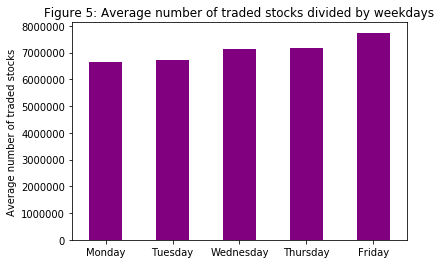

In [125]:
Market_C1=Market.copy()
Market_C1['Weekday'] = Market_C1.index.weekday
ax1 = Market_C1.groupby('Weekday')['Average_volume'].mean().plot(kind='bar', color='purple') 
ax1.set_ylabel('Average number of traded stocks')
ax1.set_title('Figure 5: Average number of traded stocks divided by weekdays')
ax1.set_xlabel('')
plt.xticks(np.arange(5),('Monday','Tuesday','Wednesday','Thursday','Friday'), rotation='horizontal')
for txt in ax1.texts:
    txt.set_visible(False)

Here we see that the average number of traded stocks is rising through the week, which means that the number of traded stocks monday is less than the traded stocks friday. We also see that the average number of traded stocks on a weekday is approximately 7 billion. The general growth in stock prices during the week cannot be explained by time alone, as it's represented by the averege trading on the weekday on a nearly three years long sample. **Maybe more?**

### Volume shares of the three firms at a given date

In [126]:
# Data to plot
def Fig6():
        def figure_6(set_date):
            labels = 'Exxon Mobile','Chevron','Shell'
            sizes = [XOM.loc[set_date].volume, CVX.loc[set_date].volume, RDS.loc[set_date].volume]
            colors = ['green', 'blue', 'orange']
            explode = (0, 0.1, 0)  # seperates Chevron's slice

            # Plot
            plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
            plt.title('Figure 6: Volume');
            plt.axis('equal')
        widgets.interact(figure_6, set_date=widgets.Dropdown(options=XOM.index, value=XOM.index[0],description='Date:', disabled=False,),);
Fig6()

interactive(children=(Dropdown(description='Date:', options=(Timestamp('2016-01-04 00:00:00'), Timestamp('2016…

We see that for every observation Exxon has the highest volume, while Chevron has the second highest and Shell has the lowest. This isn't very surprising as we only conider a period of roughly three years. If a firm has a general high trading volume, which isn't caused by shocks, and is of a relative large size one would expect the firm to have that high trading volume in the following observations as well. It is however interesting to see that Exxon is the most traded stock and represents more than half the market of the three firms in some intervals and some days accord for more than 70 % of the trading volume of these firms. This is interesting as Exxon seems to be the stock with least development acconding to our earlier figures.

## **Descriptive statistics**

First we define all of the statistical variables that we are going to use to describe our dataset.

In [127]:
# Market

# First we find the observations
Observations=round(Market['Average_close'].count(),0)

# Next we find the average (Here we notice that since we got percentage change, we need to use a formula to calculate the average percentage change)
Avg_closing_price=round(Market['Average_close'].mean(),2)
Avg_volume=round(Market['Total_volume'].mean(),2)
Avg_closing_demeaned=round(Market['close_demeaned'].mean(),2)
Avg_percentage_change=round(((Market.Average_close[-1]/Market.Average_close[0])**(1/Observations)-1)*100,2)

# Next we calculate the standard diviation
Std_closing_price=round(Market['Average_close'].std(),2)
Std_volume=round(Market['Total_volume'].std(),2)
Std_close_demeaned=round(Market['close_demeaned'].std(),2)

# Next we find the minimum value and which day this occured
Min_closing_price=round(Market['Average_close'].min(),2)
Min_volume=round(Market['Total_volume'].min(),2)
Min_close_demeaned=round(Market['close_demeaned'].min(),2)

# Next we find the maximum value and which day this occured
Max_closing_price=round(Market['Average_close'].max(),2)
Max_volume=round(Market['Total_volume'].max(),2)
Max_close_demeaned=round(Market['close_demeaned'].max(),2)

# And lastly we find the median, which we do by first finding the middle observation
Market_median_obs=(Observations)//2
Median_closing_price=round(Market.Average_close[Market_median_obs],2)
Median_volume=round(Market.Total_volume[Market_median_obs],2)
Median_closing_demeaned=round(Market.close_demeaned[Market_median_obs],2)

In [128]:
# Oil Market

# First we find the observations
Oil_Observations=round(Oil['price'].count(),0)

# Next we find the average (Here we notice that since we got percentage change, we need to use a formula to calculate the average percentage change)
Avg_price=round(Oil['price'].mean(),2)
Avg_price_demeaned=round(Oil['price_demeaned'].mean(),2)
Avg_percentage_change=round(((Oil.price[-1]/Oil.price[0])**(1/Oil_Observations)-1)*100,2)

# Next we calculate the standard diviation
Std_price=round(Oil['price'].std(),2)
Std_price_demeaned=round(Oil['price_demeaned'].std(),2)

# Next we find the minimum value and which day this occured
Min_price=round(Oil['price'].min(),2)
Min_price_demeaned=round(Oil['price_demeaned'].min(),2)

# Next we find the maximum value and which day this occured
Max_price=round(Oil['price'].max(),2)
Max_price_demeaned=round(Oil['price_demeaned'].max(),2)

# And lastly we find the median, which we do by first finding the middle observation
Oil_median_obs=(Oil_Observations)//2
Median_price=round(Oil.price[Oil_median_obs],2)
Median_price_demeaned=round(Oil.price_demeaned[Oil_median_obs],2)

In [129]:
# Exxon Mobile

# First we find the observations
Observations_XOM=round(XOM['close'].count(),0)

# Next we find the average (Here we notice that since we got percentage change, we need to use a formula to calculate the average percentage change)
Avg_closing_price_XOM=round(XOM['close'].mean(),2)
Avg_volume_XOM=round(XOM['volume'].mean(),2)
Avg_closing_demeaned_XOM=round(XOM['close_demeaned'].mean(),2)
Avg_percentage_change_XOM=round(((XOM.close[-1]/XOM.close[0])**(1/Observations_XOM)-1)*100,2)

# Next we calculate the standard diviation
Std_closing_price_XOM=round(XOM['close'].std(),2)
Std_volume_XOM=round(XOM['volume'].std(),2)
Std_close_demeaned_XOM=round(XOM['close_demeaned'].std(),2)

# Next we find the minimum value and which day this occured
Min_closing_price_XOM=round(XOM['close'].min(),2)
Min_volume_XOM=round(XOM['volume'].min(),2)
Min_close_demeaned_XOM=round(XOM['close_demeaned'].min(),2)

# Next we find the maximum value and which day this occured
Max_closing_price_XOM=round(XOM['close'].max(),2)
Max_volume_XOM=round(XOM['volume'].max(),2)
Max_close_demeaned_XOM=round(XOM['close_demeaned'].max(),2)

# And lastly we find the median, which we do by first finding the middle observation
XOM_median_obs=(Observations_XOM)//2
Median_closing_price_XOM=round(XOM.close[XOM_median_obs],2)
Median_volume_XOM=round(XOM.volume[XOM_median_obs],2)
Median_closing_demeaned_XOM=round(XOM.close_demeaned[XOM_median_obs],2)

In [130]:
# Chevron

# First we find the observations
Observations_CVX=round(CVX['close'].count(),0)

# Next we find the average (Here we notice that since we got percentage change, we need to use a formula to calculate the average percentage change)
Avg_closing_price_CVX=round(CVX['close'].mean(),2)
Avg_volume_CVX=round(CVX['volume'].mean(),2)
Avg_closing_demeaned_CVX=round(CVX['close_demeaned'].mean(),2)
Avg_percentage_change_CVX=round(((CVX.close[-1]/CVX.close[0])**(1/Observations_CVX)-1)*100,2)

# Next we calculate the standard diviation
Std_closing_price_CVX=round(CVX['close'].std(),2)
Std_volume_CVX=round(CVX['volume'].std(),2)
Std_close_demeaned_CVX=round(CVX['close_demeaned'].std(),2)

# Next we find the minimum value and which day this occured
Min_closing_price_CVX=round(CVX['close'].min(),2)
Min_volume_CVX=round(CVX['volume'].min(),2)
Min_close_demeaned_CVX=round(CVX['close_demeaned'].min(),2)

# Next we find the maximum value and which day this occured
Max_closing_price_CVX=round(CVX['close'].max(),2)
Max_volume_CVX=round(CVX['volume'].max(),2)
Max_close_demeaned_CVX=round(CVX['close_demeaned'].max(),2)

# And lastly we find the median, which we do by first finding the middle observation
CVX_median_obs=(Observations_CVX)//2
Median_closing_price_CVX=round(CVX.close[CVX_median_obs],2)
Median_volume_CVX=round(CVX.volume[CVX_median_obs],2)
Median_closing_demeaned_CVX=round(CVX.close_demeaned[CVX_median_obs],2)

In [131]:
# Shell

# First we find the observations
Observations_RDS=round(RDS['close'].count(),0)

# Next we find the average (Here we notice that since we got percentage change, we need to use a formula to calculate the average percentage change)
Avg_closing_price_RDS=round(RDS['close'].mean(),2)
Avg_volume_RDS=round(RDS['volume'].mean(),2)
Avg_closing_demeaned_RDS=round(RDS['close_demeaned'].mean(),2)
Avg_percentage_change_RDS=round(((RDS.close[-1]/RDS.close[0])**(1/Observations_RDS)-1)*100,2)

# Next we calculate the standard diviation
Std_closing_price_RDS=round(RDS['close'].std(),2)
Std_volume_RDS=round(RDS['volume'].std(),2)
Std_close_demeaned_RDS=round(RDS['close_demeaned'].std(),2)

# Next we find the minimum value and which day this occured
Min_closing_price_RDS=round(RDS['close'].min(),2)
Min_volume_RDS=round(RDS['volume'].min(),2)
Min_close_demeaned_RDS=round(RDS['close_demeaned'].min(),2)

# Next we find the maximum value and which day this occured
Max_closing_price_RDS=round(RDS['close'].max(),2)
Max_volume_RDS=round(RDS['volume'].max(),2)
Max_close_demeaned_RDS=round(RDS['close_demeaned'].max(),2)

# And lastly we find the median, which we do by first finding the middle observation
RDS_median_obs=(Observations_RDS)//2
Median_closing_price_RDS=round(RDS.close[RDS_median_obs],2)
Median_volume_RDS=round(RDS.volume[RDS_median_obs],2)
Median_closing_demeaned_RDS=round(RDS.close_demeaned[RDS_median_obs],2)

And then we combine all the variables in one table

In [132]:
TableL1 = pd.DataFrame({'Market':Observations,'Oil Market':Oil_Observations,'Exxon Mobile':Observations_XOM,'Chevron':Observations_CVX,'Shell':Observations_RDS}, index=['Observations'])

TableLL = pd.DataFrame({'Market':'','Oil Market':'','Exxon Mobile':'','Chevron':'','Shell':''}, index=[''])

TableL2 = pd.DataFrame({'Market':'','Oil Market':'','Exxon Mobile':'','Chevron':'','Shell':''}, index=['Closing price'])
TableL3 = pd.DataFrame({'Market':Avg_closing_price,'Oil Market':Avg_price,'Exxon Mobile':Avg_closing_price_XOM,'Chevron':Avg_closing_price_CVX,'Shell':Avg_closing_price_RDS}, index=['Average'])
TableL4 = pd.DataFrame({'Market':Std_closing_price,'Oil Market':Std_price,'Exxon Mobile':Std_closing_price_XOM,'Chevron':Std_closing_price_CVX,'Shell':Std_closing_price_RDS}, index=['Standard deviation'])
TableL5 = pd.DataFrame({'Market':Min_closing_price,'Oil Market':Min_price,'Exxon Mobile':Min_closing_price_XOM,'Chevron':Min_closing_price_CVX,'Shell':Min_closing_price_RDS}, index=['Minimum'])
TableL6 = pd.DataFrame({'Market':Max_closing_price,'Oil Market':Max_price,'Exxon Mobile':Max_closing_price_XOM,'Chevron':Max_closing_price_CVX,'Shell':Max_closing_price_RDS}, index=['Maximum'])
TableL7 = pd.DataFrame({'Market':Median_closing_price,'Oil Market':Median_price,'Exxon Mobile':Median_closing_price_XOM,'Chevron':Median_closing_price_CVX,'Shell':Median_closing_price_RDS}, index=['Median'])

TableL8 = pd.DataFrame({'Market':'','Oil Market':'','Exxon Mobile':'','Chevron':'','Shell':''}, index=['Closing price demeaned'])
TableL9 = pd.DataFrame({'Market':Avg_closing_demeaned,'Oil Market':Avg_price_demeaned,'Exxon Mobile':Avg_closing_demeaned_XOM,'Chevron':Avg_closing_demeaned_CVX,'Shell':Avg_closing_demeaned_RDS}, index=['Average'])
TableL10 = pd.DataFrame({'Market':Std_close_demeaned,'Oil Market':Std_price_demeaned,'Exxon Mobile':Std_close_demeaned_XOM,'Chevron':Std_close_demeaned_CVX,'Shell':Std_close_demeaned_RDS}, index=['Standard deviation'])
TableL11 = pd.DataFrame({'Market':Min_close_demeaned,'Oil Market':Min_price_demeaned,'Exxon Mobile':Min_close_demeaned_XOM,'Chevron':Min_close_demeaned_CVX,'Shell':Min_close_demeaned_RDS}, index=['Minimum'])
TableL12 = pd.DataFrame({'Market':Max_close_demeaned,'Oil Market':Max_price_demeaned,'Exxon Mobile':Max_close_demeaned_XOM,'Chevron':Max_close_demeaned_CVX,'Shell':Max_close_demeaned_RDS}, index=['Maximum'])
TableL13 = pd.DataFrame({'Market':Median_closing_demeaned,'Oil Market':Median_price_demeaned,'Exxon Mobile':Median_closing_demeaned_XOM,'Chevron':Median_closing_demeaned_CVX,'Shell':Median_closing_demeaned_RDS}, index=['Median'])

TableL14 = pd.DataFrame({'Market':'','Oil Market':'','Exxon Mobile':'','Chevron':'','Shell':''}, index=['Percentage change in closing price'])
TableL15 = pd.DataFrame({'Market':Avg_percentage_change,'Oil Market':Avg_percentage_change,'Exxon Mobile':Avg_percentage_change_XOM,'Chevron':Avg_percentage_change_CVX,'Shell':Avg_percentage_change_RDS}, index=['Average'])

TableL16 = pd.DataFrame({'Market':'','Oil Market':'','Exxon Mobile':'','Chevron':'','Shell':''}, index=['Volume'])
TableL17 = pd.DataFrame({'Market':Avg_volume,'Oil Market':'','Exxon Mobile':Avg_volume_XOM,'Chevron':Avg_volume_CVX,'Shell':Avg_volume_RDS}, index=['Average'])
TableL18 = pd.DataFrame({'Market':Std_volume,'Oil Market':'','Exxon Mobile':Std_volume_XOM,'Chevron':Std_volume_CVX,'Shell':Std_volume_RDS}, index=['Standard deviation'])
TableL19 = pd.DataFrame({'Market':Min_volume,'Oil Market':'','Exxon Mobile':Min_volume_XOM,'Chevron':Min_volume_CVX,'Shell':Min_volume_RDS}, index=['Minimum'])
TableL20 = pd.DataFrame({'Market':Max_volume,'Oil Market':'','Exxon Mobile':Max_volume_XOM,'Chevron':Max_volume_CVX,'Shell':Max_volume_RDS}, index=['Maximum'])
TableL21 = pd.DataFrame({'Market':Median_volume,'Oil Market':'','Exxon Mobile':Median_volume_XOM,'Chevron':Median_volume_CVX,'Shell':Median_volume_RDS}, index=['Median'])

Table1 = pd.concat([TableL1,TableLL,TableL2,TableL3,TableL4,TableL5,TableL6,TableL7,TableLL,TableL8,TableL9,TableL10,TableL11,TableL12,TableL13,TableLL,TableL14,TableL15,TableLL,TableL16,TableL17,TableL18,TableL19,TableL20,TableL21])

Table1

,Market,Oil Market,Exxon Mobile,Chevron,Shell
Observations,808,805,808,808,808
,,,,,
Closing price,,,,,
Average,78.22,53.14,75.93,103.47,55.26
Standard deviation,8.15,10.5,3.72,13.01,9.99
Minimum,54.15,26.19,63.35,68.65,30.46
Maximum,92.59,77.41,83.83,126.12,74.53
Median,76.4,47.1,73.47,101.95,53.77
,,,,,
Closing price demeaned,,,,,


In the table we see that the number of observations add up since there are 808 in each of the firms dataset and 2424 in the collective dataset. Note that there are three less observations for the oil prices, indicating that the oil market has one trading day less during a year. When we look at the closing price, we see that the average closing price is highest for Chevron (104.5 dollars), which we also saw in figure 1. Shell has the lowest (average) stock price, which is 55.26 dollars. When considering the volatility we see that Chevron and Shell are more volatile than Exxon, which we also see when looking at the highest and lowest stock price in the period for each of the three firms. Here we see that the span between min and max for Exxon is much smaller than it is for Chevron and Shell. The closing price demeaned average is 0 for all firms and the standard deviation is the same as for closing price. This is due to the definitation of the variable. We also see that Chevron experienced both the highest postive change (22.87 dollars) and negative change (-35.16 dollars), although we would anticipate this since Chevron's stockprice is higher in terms of an absolute value. When we look at the average change in the closing price, we get that Shell has grown relatively more than the two other firms. Shell has an average percentage change in the closing price at 0.07% per day. Lastly, we look at the volume, where we see that Exxon is the most traded stock with an average of 12.4 billion stocks traded a day, this can be explained by the lower price compared to Chevron. The reason why Shell doesn't get traded as much could be due to the number of shares and because we only consider the B-shares. When looking at the maximum number of traded stocks, we see that one day Exxon stocks were traded 47,3 billion times, and when looking at the minimum we see that only 436.660 of the Shell stock was traded one day.